1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats  #skewness değeri bulacağımız için istatiksel kütüphane
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin,clone

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [59]:
column_name=["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model Year","Origin"]

In [60]:
column_name

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Origin']

In [61]:
data=pd.read_csv("auto-mpg.data",names=column_name,na_values="?",comment="\t",sep=" ",skipinitialspace=True)

In [62]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [63]:
data=data.rename(columns={"MPG":"target"})

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [65]:
describe=data.describe()
describe

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Missing value

In [66]:
data.isnull().sum() 

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

 horsepower eksik verilerin dağılımına bakkalım

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

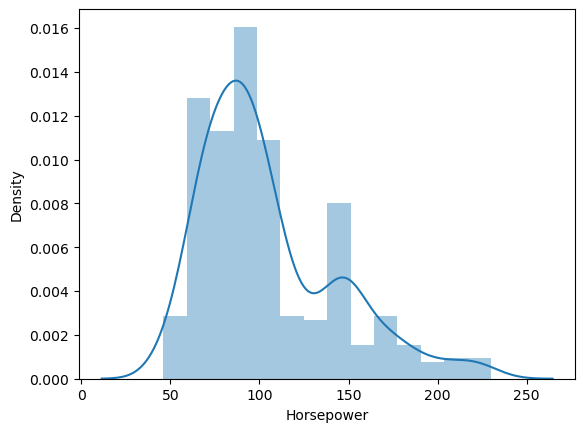

In [68]:
data["Horsepower"]=data["Horsepower"].fillna(data["Horsepower"].mean()) # ortalam ile doldurduk
sns.distplot(data.Horsepower)

pozitif skewness söz konusu
104 ile doldurduk.

### EDA

Text(0.5, 1.0, 'Correlation between features')

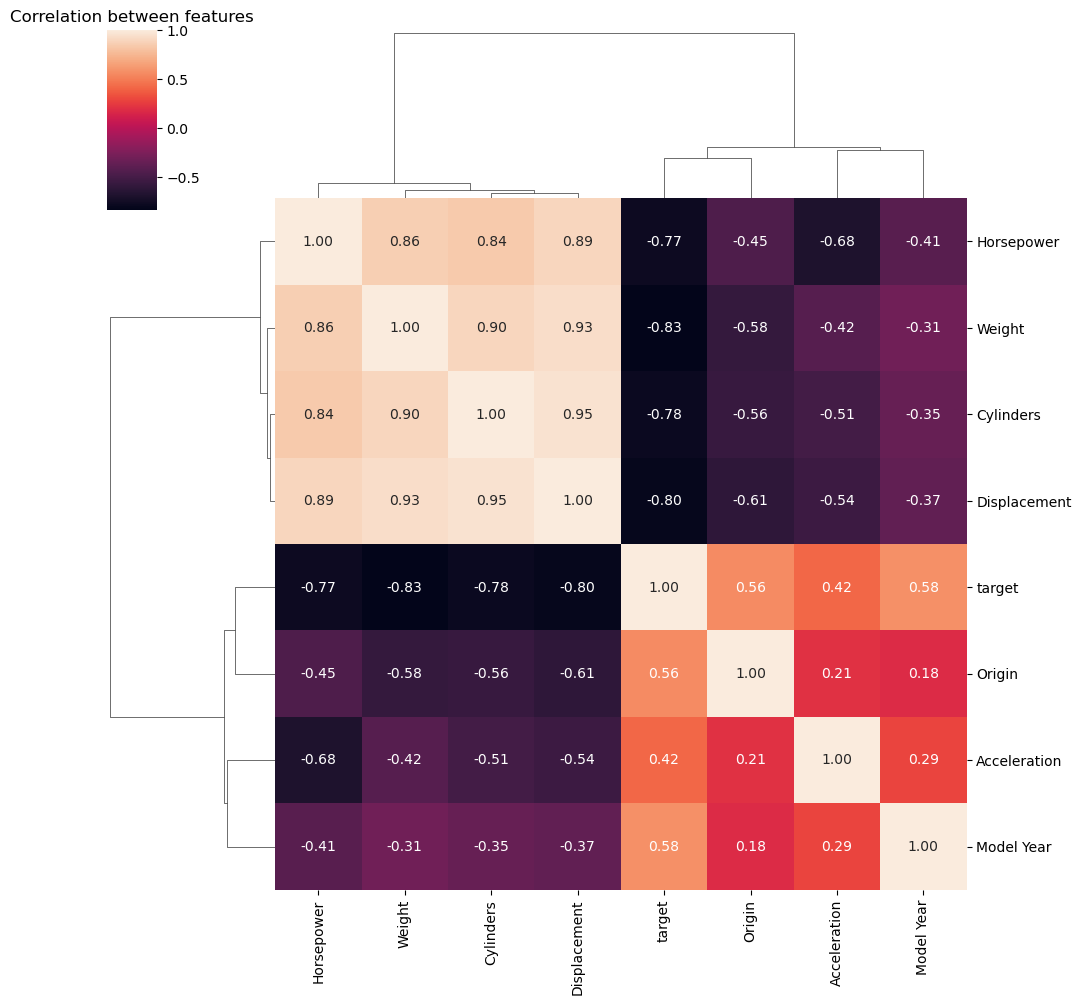

In [69]:
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation between features")


* target depenant, others independent
* sağ üstte yüksek korelasyonlar mevcut

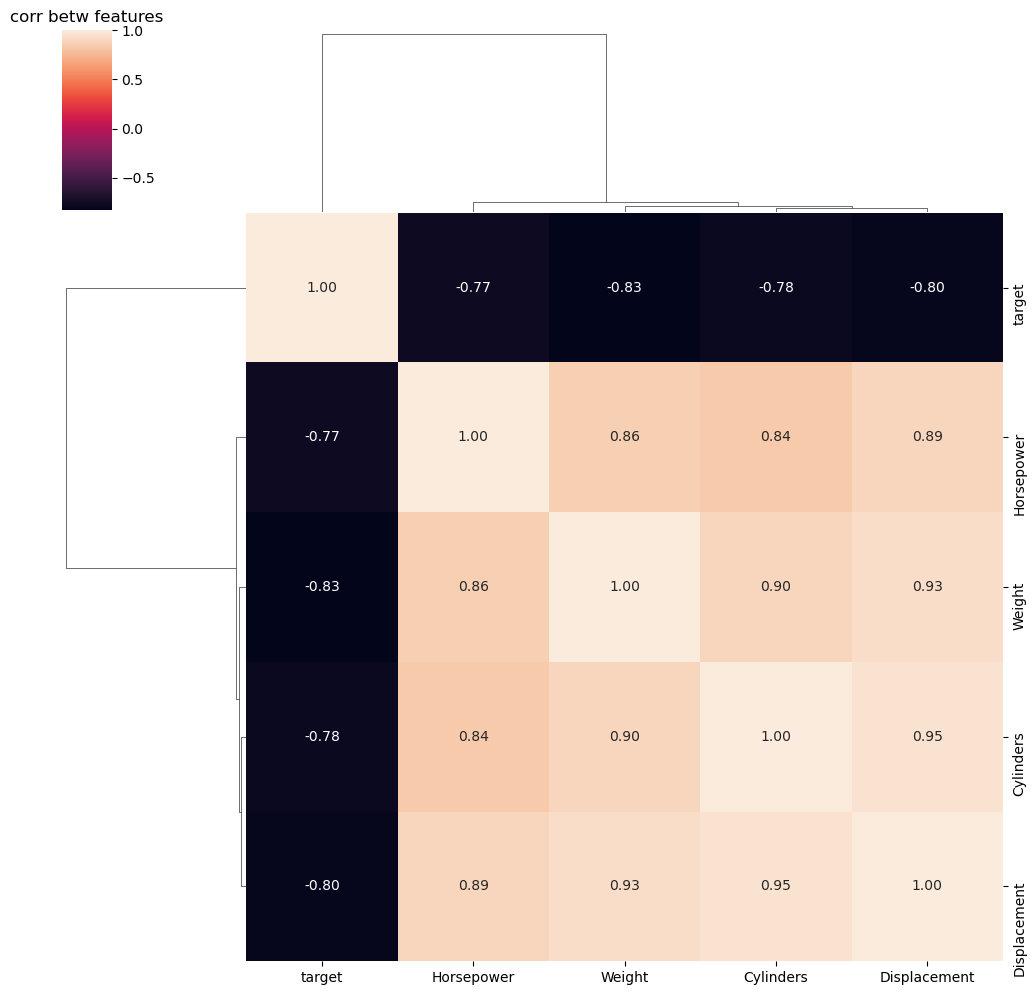

In [70]:
threshold=0.75
filtre=np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("corr betw features")
plt.show()

 +-075 den büyük olanlar
 yüksek korele olanlar birbiriyle eş düzlemdir(multicorrlinearity modeli yanloş yönlendirebilir.Yani bi tane yetiyorsa diğerleritle uğraşmaya gerek yok. burada da mevcut
 "

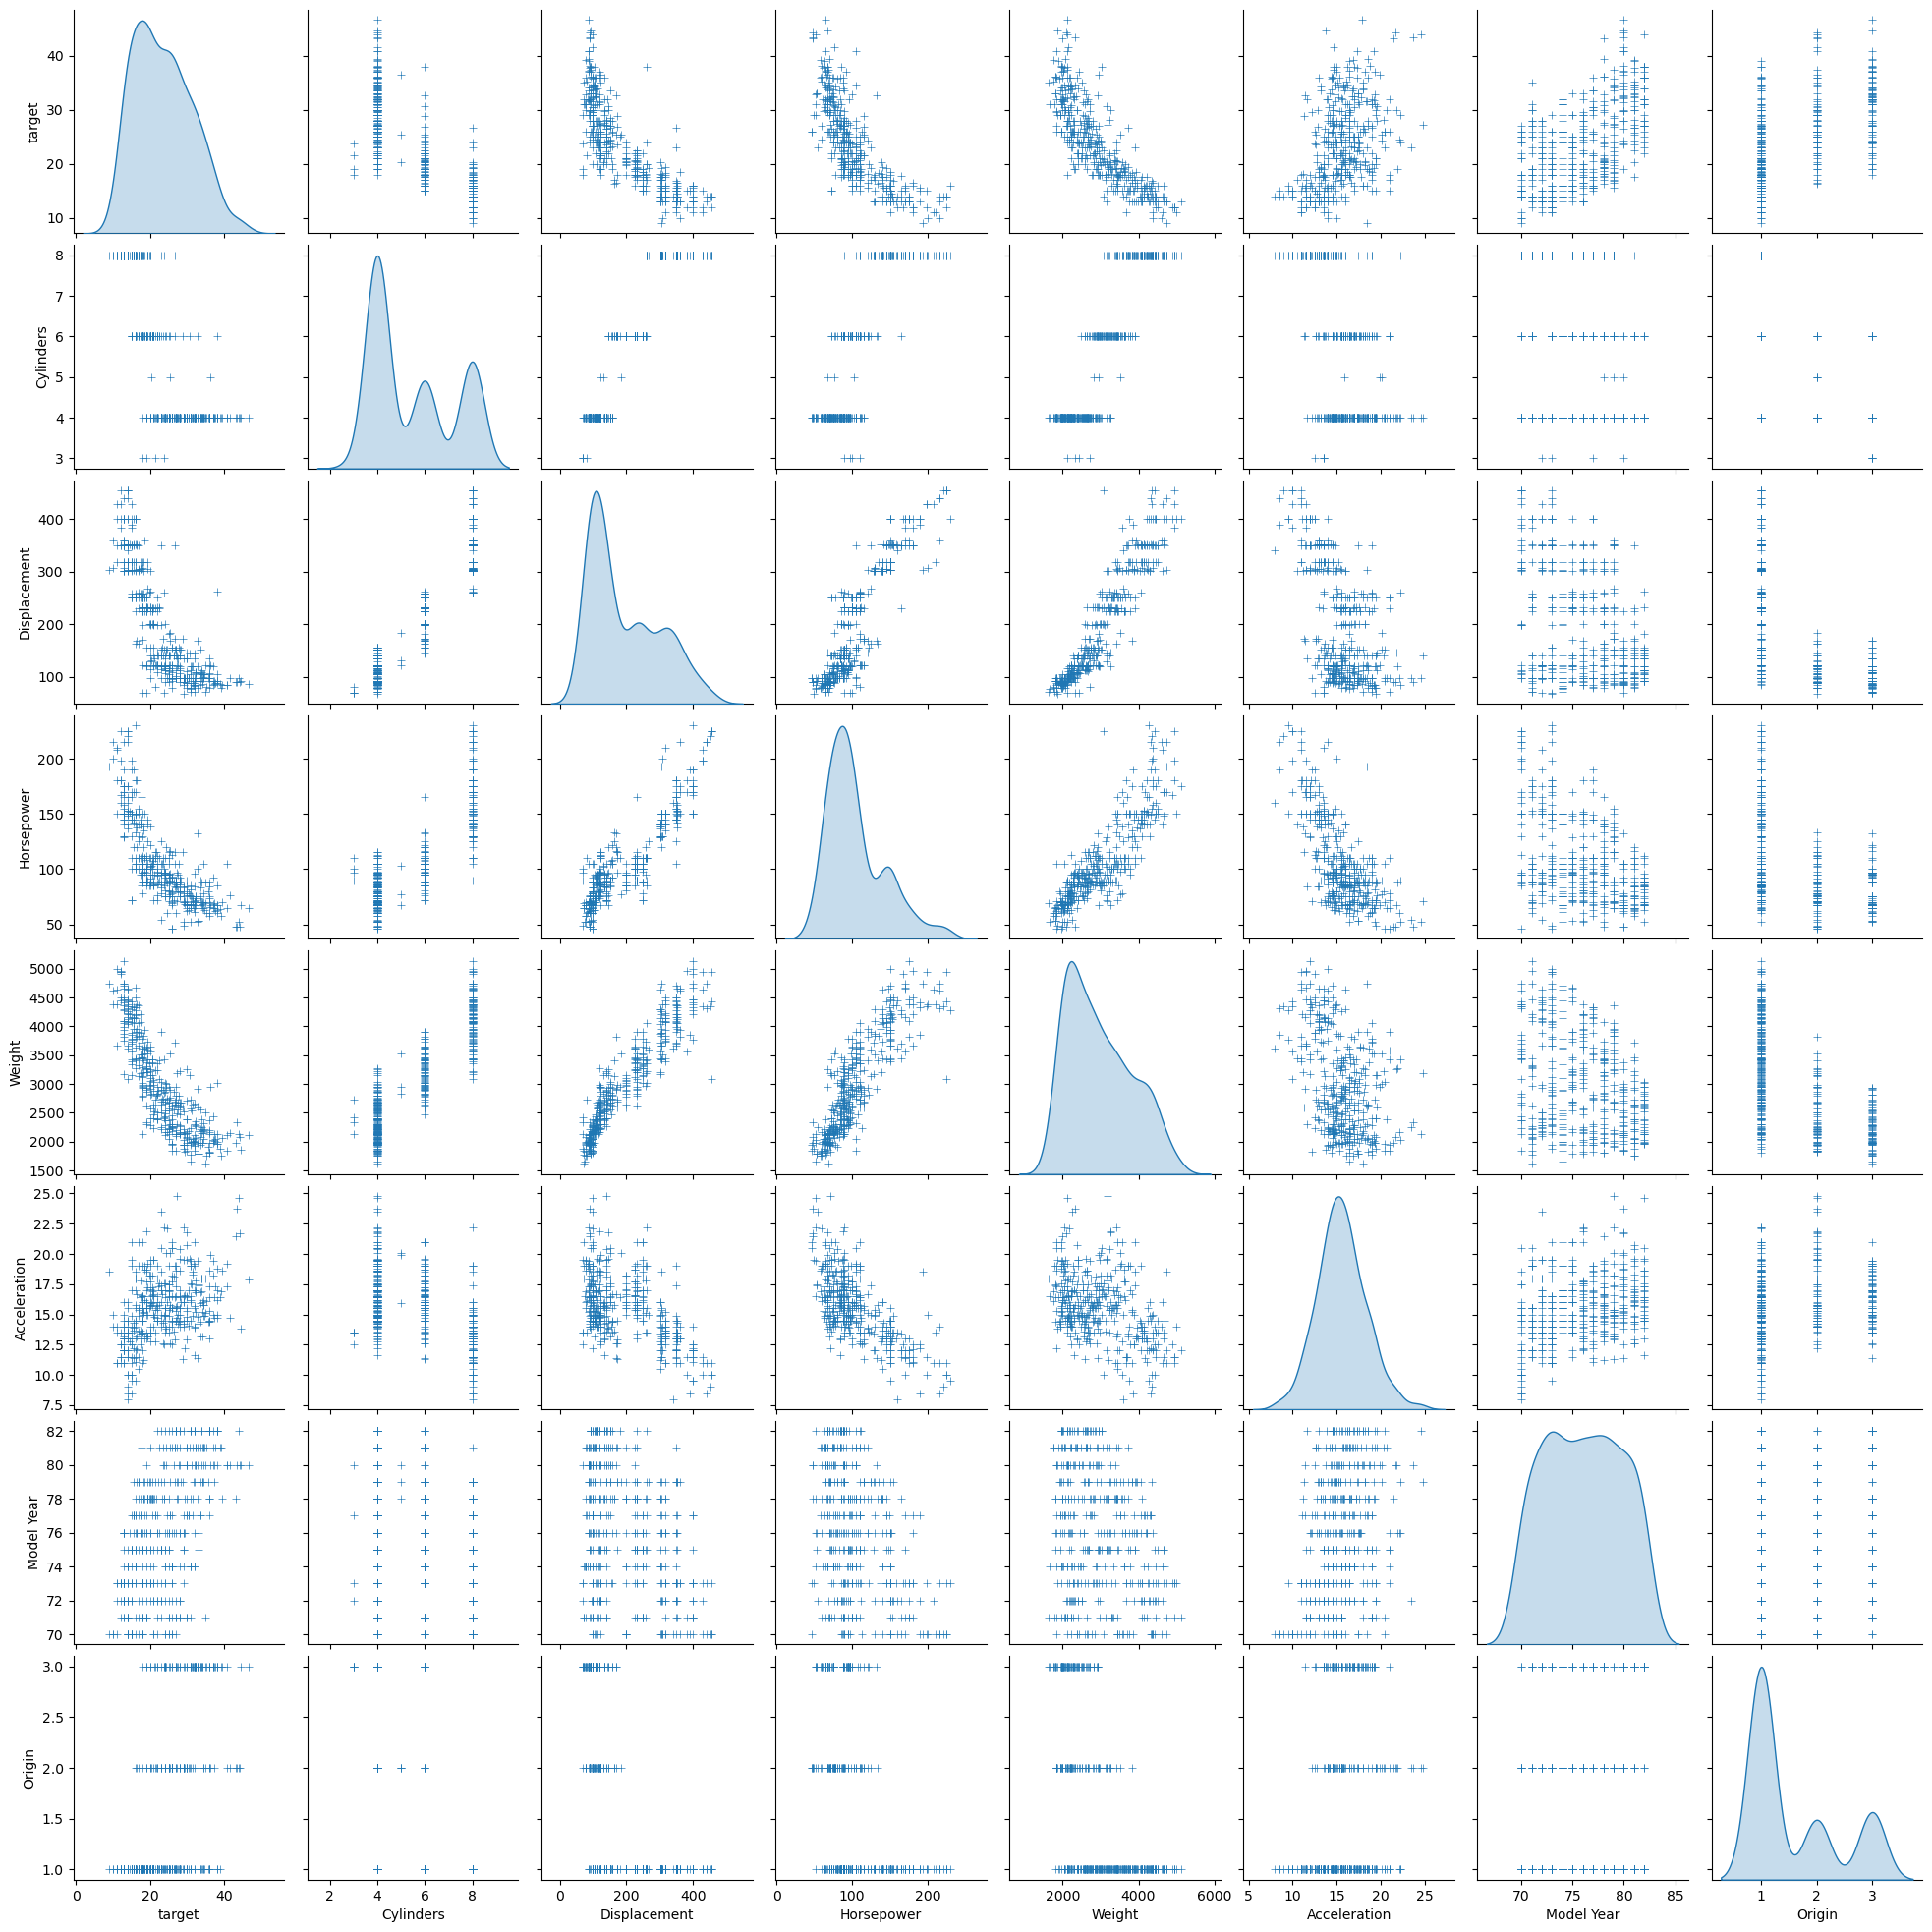

In [71]:
sns.pairplot(data,diag_kind="kde",markers="+")
plt.savefig("pairplot.png")

* targetla olan ilişkiler önemli
* siilindirleri ve originler kategorik olabilir.
* multicorelinearity var.


4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


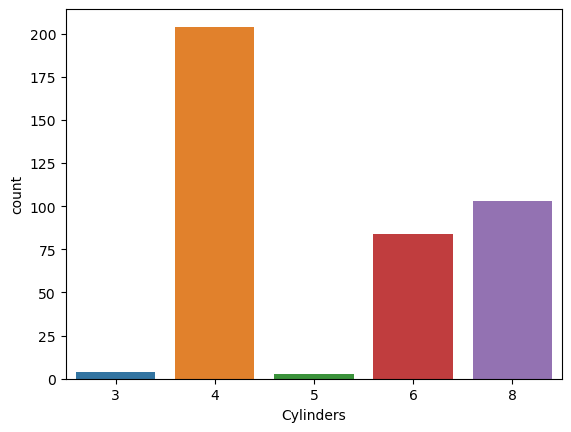

In [72]:
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

4,6,8 den çok var kategorik hale getirilenilir.
feature eng yapılacak

1    249
3     79
2     70
Name: Origin, dtype: int64


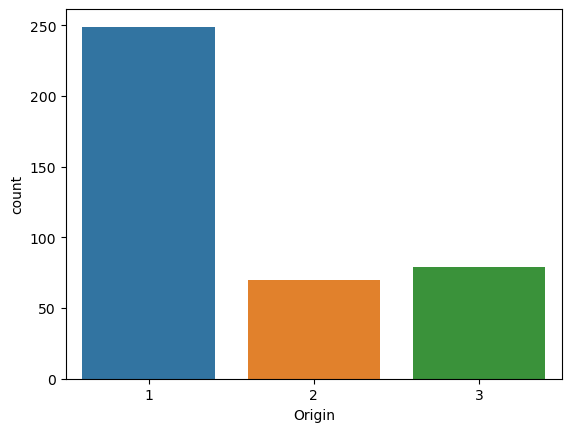

In [73]:
plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())

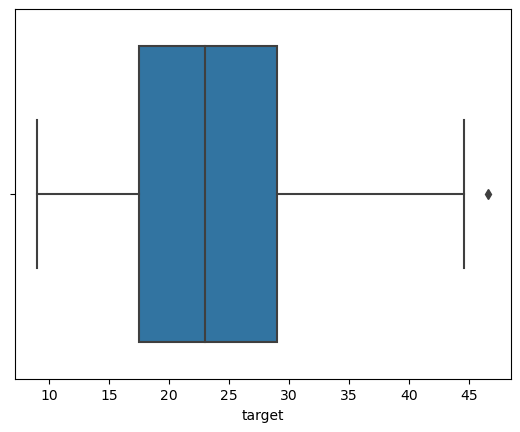

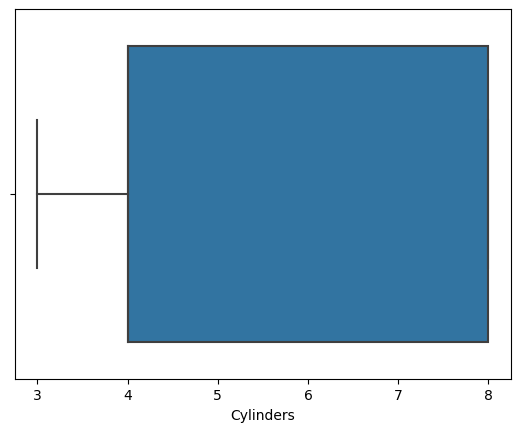

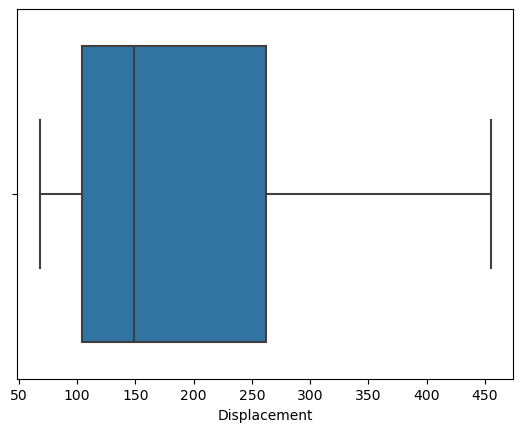

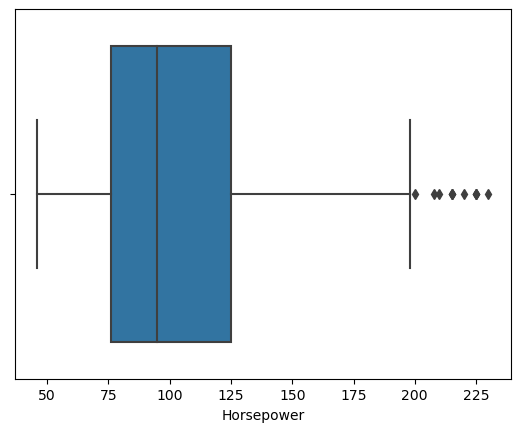

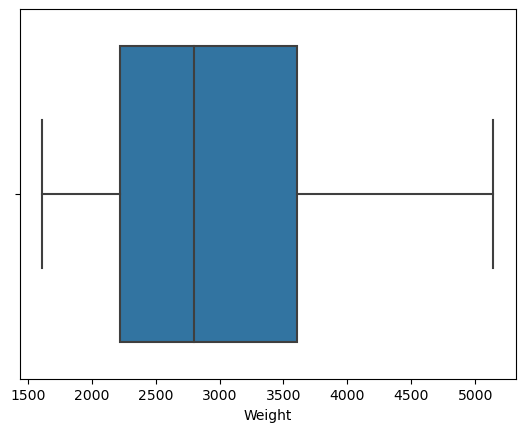

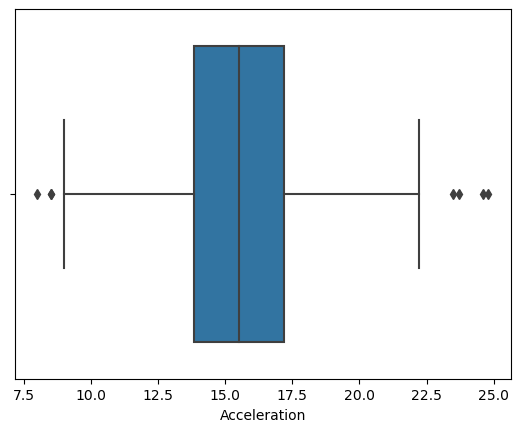

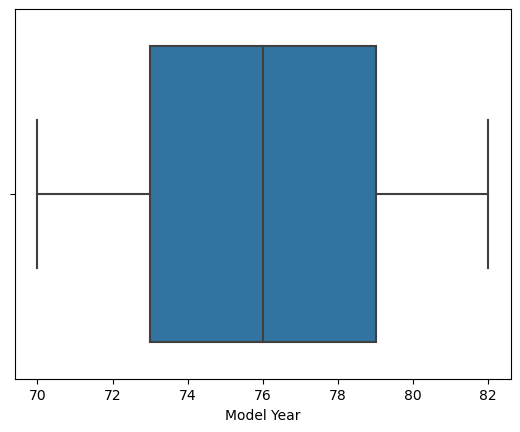

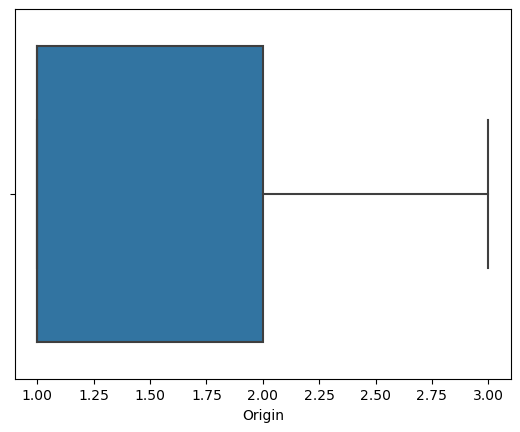

In [74]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c,data=data,orient= "vertical")

* görüldüğü üzere accelerationda outlierlar söz konusu. bunları çıkarmak gerek
* horsepowerda var.


### outlier
* box plot ile kolayca tespit ederiz.
* acceleration, horsepower

In [75]:
thr=2 # genelde 1.5 alırız. aslında alt sınır ama arttıra da biliriz
horsepower_desc=describe["Horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

4 ve 6. indexteki q1 ve q3 quartilelar.

In [76]:
q3_hp=horsepower_desc[6]
q1_hp=horsepower_desc[4]
IQR_hp=q3_hp-q1_hp

top_limit_hp=q3_hp+thr*IQR_hp
bottom_limit_hp=q1_hp-thr*IQR_hp

filter_hp_bottom=bottom_limit_hp<data["Horsepower"]
filter_hp_top=top_limit_hp>data["Horsepower"]
filter_hp=filter_hp_bottom &filter_hp_top #birleştirdik.

data=data[filter_hp]
data

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [77]:
#acceleration

In [78]:
acceleration_desc=describe["Acceleration"]
acceleration_desc

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [79]:
q3_acc=acceleration_desc[6]
q1_acc=acceleration_desc[4]
IQR_acc=q3_acc-q1_acc

top_limit_acc=q3_acc+thr*IQR_acc
bottom_limit_acc=q1_acc-thr*IQR_acc

filter_acc_bottom=bottom_limit_acc<data["Acceleration"]
filter_acc_top=top_limit_acc>data["Acceleration"]
filter_acc=filter_acc_bottom &filter_acc_top #birleştirdik.

data=data[filter_acc]
data

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


#3 tane outlier veriden çıkarıldı. çıkarılmadığı takdirde modeli saptırır !

### feature eng.

In [80]:
#skewness
# target-dependent variable

<AxesSubplot:xlabel='target', ylabel='Density'>

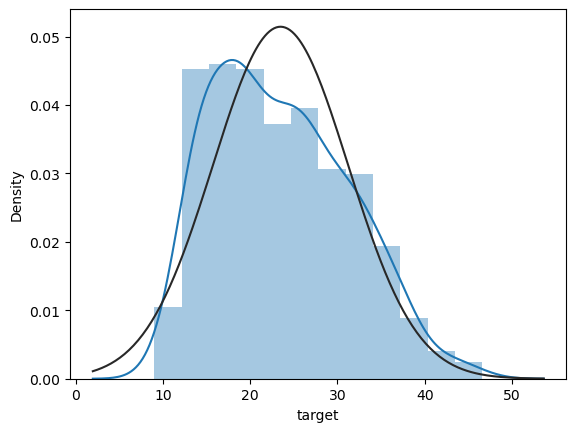

In [81]:
sns.distplot(data.target,fit=norm)

* siyah olan normal dağılım
* maviolan pozitif skewness a sahip mevcut dağılım

In [82]:
(mu,sigma)=norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 23.472405063291134, sigma: 7.756119546409932


In [83]:
## qq plot ile dağılım da incelene bilir.

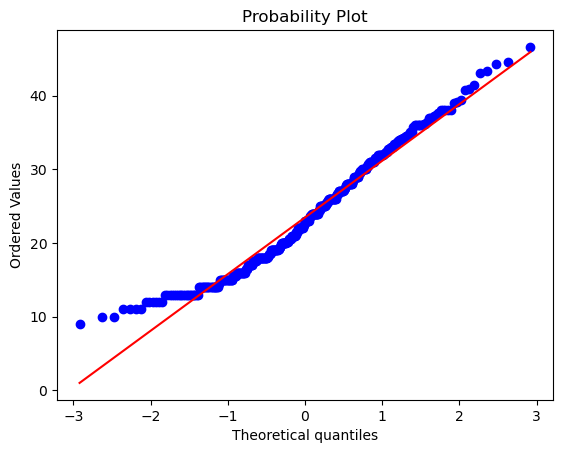

In [84]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

* data kırmızı çizgi üstünde olsaydı normal dağılıma sahip olurdu.
* uç noktalarda normal değil

In [85]:
# skewness azalmak için:

<AxesSubplot:xlabel='target', ylabel='Density'>

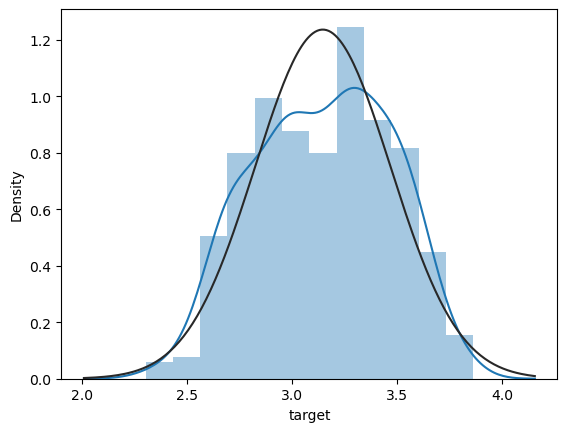

In [86]:
data["target"]=np.log1p(data["target"])   # skewness azaltma.

plt.figure()
sns.distplot(data.target,fit=norm)

* mavi normale yakın hale geldi !

In [87]:
(mu,sigma)=norm.fit(data["target"])
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 3.146474056830183, sigma: 0.3227569103044823


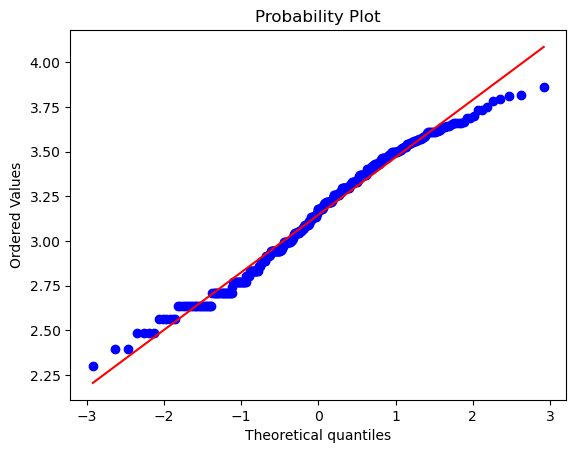

In [88]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

* baştakiler azalmış

In [89]:
# feature- independent variable

In [90]:
skewed_feats=data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame(skewed_feats,columns=["skewed"])

In [91]:
skewness

,skewed
Horsepower,1.067743
Origin,0.923381
Displacement,0.714682
Weight,0.533226
Cylinders,0.523374
Acceleration,0.168986
Model Year,0.013098
target,-0.117687


* x>1 ise po<itif skewness   # igmal edilebilir
* x<-1 ise negatif skewness
* box cox transformation yöntemi ile skewnesslık azaltılabilir.
* sonuç: dependenttaki skewness azaltıldı.independenta bir şey yapılmadı

##### onehot encoding
* kategorik veriler örneğin 1,2,3 olsun. bunları 1,0,0-0,1,0-0,0,1 haline getiriyoruz
* yapılmazsa modeli bozabilir.

In [92]:
data["Cylinders"]=data["Cylinders"].astype(str) #önce kategorik yaptım.
data["Origin"]=data["Origin"].astype(str)

data=pd.get_dummies(data)
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


### train-test split-standardization

In [94]:
x=data.drop(["target"],axis=1)
y=data.target

In [95]:
x

,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


In [96]:
y

0      2.944439
1      2.772589
2      2.944439
3      2.833213
4      2.890372
         ...   
392    3.332205
393    3.332205
395    3.496508
396    3.367296
397    3.465736
Name: target, Length: 395, dtype: float64

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.9,random_state=42)

In [98]:
X_train

,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
54,72.0,69.000000,1613.0,18.0,71,0,1,0,0,0,0,0,1
50,116.0,90.000000,2123.0,14.0,71,0,1,0,0,0,0,1,0
175,90.0,70.000000,1937.0,14.0,75,0,1,0,0,0,0,1,0
190,351.0,152.000000,4215.0,12.8,76,0,0,0,0,1,1,0,0
395,135.0,84.000000,2295.0,11.6,82,0,1,0,0,0,1,0,0
188,318.0,150.000000,4190.0,13.0,76,0,0,0,0,1,1,0,0
170,140.0,78.000000,2592.0,18.5,75,0,1,0,0,0,1,0,0
58,97.5,80.000000,2126.0,17.0,72,0,1,0,0,0,1,0,0
48,250.0,88.000000,3139.0,14.5,71,0,0,0,1,0,1,0,0
346,97.0,67.000000,2065.0,17.8,81,0,1,0,0,0,0,0,1


In [99]:
## standardization

In [137]:
scaler=StandardScaler() # robust ta olabilir
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [138]:
X_test #mean 0 std 1 olarak ayarladık

array([[-0.55171516, -0.30556651,  0.23597741, ..., -1.13759292,
         1.96850197, -0.54772256],
       [-0.32262928, -0.13651504,  0.08795885, ...,  0.87904907,
        -0.50800051, -0.54772256],
       [ 1.051886  ,  0.47207027,  0.73716308, ...,  0.87904907,
        -0.50800051, -0.54772256],
       ...,
       [-0.55171516, -0.27175621, -0.82741911, ..., -1.13759292,
        -0.50800051,  1.82574186],
       [-0.68916669, -0.71129004, -0.69108623, ..., -1.13759292,
        -0.50800051,  1.82574186],
       [-0.89534399, -1.62416799, -1.05464059, ..., -1.13759292,
         1.96850197, -0.54772256]])

### Machine-Learning


#### Linear Regression

In [139]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("LR coef: ",lr.coef_)
y_predicted_dummy=lr.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("LR mse: ",mse)

LR coef:  [-9.92705759e-02 -1.05006197e-01 -2.28689229e-02 -4.99057559e-02
  4.34952012e-02 -5.72828846e-02  4.72375426e-02 -3.46944695e-18
 -1.40612813e-02 -2.28840651e-02 -7.11143569e-03 -2.73464310e-02
  3.45783731e-02]
LR mse:  0.020632204780133036


#### Regularization1: Ridge Regression
* amaç: least square error+lambda*slope**2 yi minimize etmek.slope katsayı. varyansı azaltır.overfiti önler

Ridge coef:  [-0.07849695 -0.09734007 -0.03799319 -0.04613241  0.04520109 -0.0535352
  0.05108925  0.         -0.01455674 -0.02919833 -0.00857541 -0.02556196
  0.03459116]
Ridge Best Estimator Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
ridge mse:  0.01972533801080128
********************************************


Text(0.5, 1.0, 'Ridge')

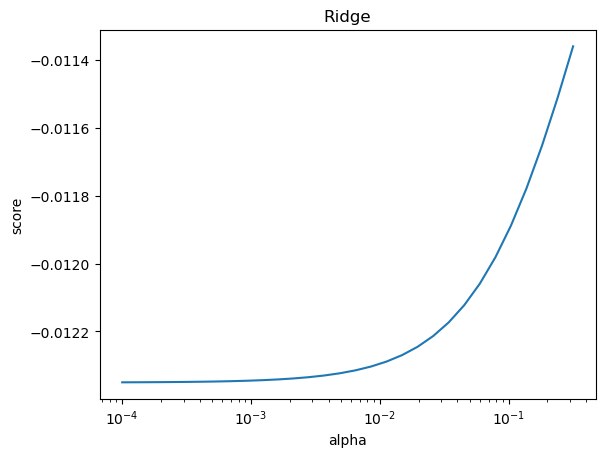

In [140]:
ridge=Ridge(random_state=42,max_iter=10000)

alphas=np.logspace(-4,-0.5,30)
tuned_parameters=[{"alpha":alphas}]
n_folds=5

clf=GridSearchCV(ridge,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

print("Ridge coef: ",clf.best_estimator_.coef_)

ridge=clf.best_estimator_

print("Ridge Best Estimator",ridge)
y_predicted_dummy=clf.predict(X_test)

mse=mean_squared_error(Y_test,y_predicted_dummy)
print("ridge mse: ",mse)
print("********************************************")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

* ridge de 0.019 oldu

#### Regularization2: Lasso Regression


 * ridgeden farklı lambda.mutlakdeğer(slope)
 * avantaj:high coreleated feature lardan sadece birini kullanıyor
 * regularization temel amacı overfittingi önlemek

lasso coef:  [-0.03758778 -0.08757891 -0.0646061  -0.02803523  0.0491826  -0.03359315
  0.071679    0.          0.         -0.01794883 -0.         -0.00408397
  0.04250482]
lasso Best Estimator Lasso(alpha=0.004893900918477494, max_iter=10000, random_state=42)
lasso mse:  0.01752159477082249
********************************************


Text(0.5, 1.0, 'lasso')

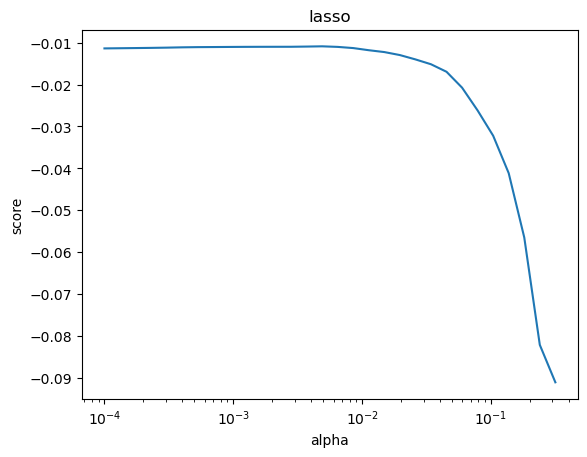

In [141]:
lasso=Lasso(random_state=42,max_iter=10000)

alphas=np.logspace(-4,-0.5,30)
tuned_parameters=[{"alpha":alphas}]
n_folds=5

clf=GridSearchCV(lasso,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

print("lasso coef: ",clf.best_estimator_.coef_)

lasso=clf.best_estimator_

print("lasso Best Estimator",lasso)
y_predicted_dummy=clf.predict(X_test)

mse=mean_squared_error(Y_test,y_predicted_dummy)
print("lasso mse: ",mse)
print("********************************************")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("lasso")

* gereksiz featuralrı 0 yapmış
* mse: 0.017 daha iyi

#### Regularization3: Elasticnet Regression


* amaç yine least squared erroru min etmek
* lambda*slope**2 +lambda*mutlak(slope) minimize eder. lasso ridge karışımı.
* high korelated ların çıkarılmasında iyi
* linear reg. sadece lse min etmeye çalışıyoruz.
* ridge de lambda*slope**2 ekledik ve min etmeye çalışdık
* lassoda lambda*mutlak(slope) ekleyip min etmeye çalışdık
* enet de hepsini min etmeye çalışıcaz.

In [142]:
parameterGrid={"alpha": alphas,
              "l1_ratio":np.arange(0.0,1.0,0.05)}

In [143]:

eNet=ElasticNet(random_state=42,max_iter=10000)
clf=GridSearchCV(eNet,parameterGrid,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)

print("ElasticNet Coef:",clf.best_estimator_.coef_)

eNet=clf.best_estimator_

print("ElasticNet Best Estimator",eNet)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet Coef: [-0.04521908 -0.07808085 -0.06742275 -0.024673    0.04776549 -0.03439345
  0.06689553  0.         -0.         -0.01879676 -0.         -0.00575413
  0.03999268]
ElasticNet Best Estimator ElasticNet(alpha=0.04520353656360245, l1_ratio=0.1, max_iter=10000,
           random_state=42)
ElasticNet MSE:  0.01749609249317252


""" !Standardscaler ile:
* LR mse:  0.020632204780133005
* ridge mse:  0.019725338010801185
* lasso mse:  0.01752159477082249
* ElasticNet MSE:  0.017496092493172515

"""

#### Robust Scaler için durum nasıl olurdu?*********************************

In [127]:
scaler=RobustScaler() # robust ta olabilir
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [128]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("LR coef: ",lr.coef_)
y_predicted_dummy=lr.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("LR mse: ",mse)

LR coef:  [-1.52652234e-01 -1.10059003e-01 -3.51567523e-02 -7.81023601e-02
  7.76057988e-02 -6.59172563e-02  4.14081357e-02  2.08166817e-17
 -3.70768032e-02 -4.25933806e-02 -6.27384408e-03 -2.40888628e-02
  3.79773605e-02]
LR mse:  0.020487058280775586


Ridge coef:  [-0.10204409 -0.10347631 -0.06032875 -0.07025112  0.08040614 -0.06145783
  0.04764911  0.         -0.04196247 -0.05613931 -0.00905571 -0.01998794
  0.04064973]
Ridge Best Estimator Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
ridge mse:  0.01937186998245171
********************************************


Text(0.5, 1.0, 'Ridge')

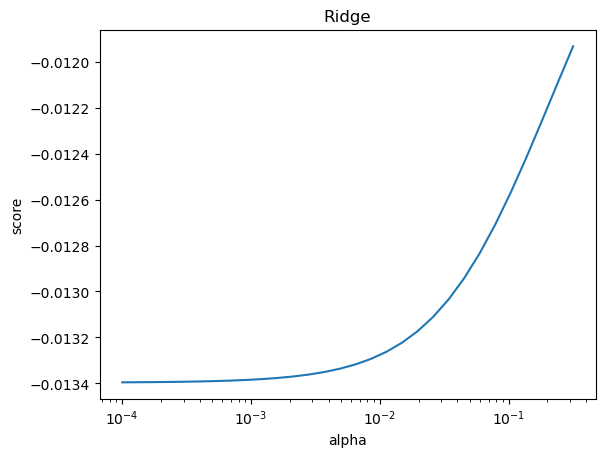

In [129]:
ridge=Ridge(random_state=42,max_iter=10000)

alphas=np.logspace(-4,-0.5,30)
tuned_parameters=[{"alpha":alphas}]
n_folds=5

clf=GridSearchCV(ridge,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

print("Ridge coef: ",clf.best_estimator_.coef_)

ridge=clf.best_estimator_

print("Ridge Best Estimator",ridge)
y_predicted_dummy=clf.predict(X_test)

mse=mean_squared_error(Y_test,y_predicted_dummy)
print("ridge mse: ",mse)
print("********************************************")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

lasso coef:  [-0.09299535 -0.10649863 -0.06181815 -0.05536314  0.07956279 -0.06280105
  0.          0.         -0.05678449 -0.06501447 -0.         -0.0091746
  0.04505276]
lasso Best Estimator Lasso(alpha=0.0028072162039411755, max_iter=10000, random_state=42)
lasso mse:  0.018707192302889232
********************************************


Text(0.5, 1.0, 'lasso')

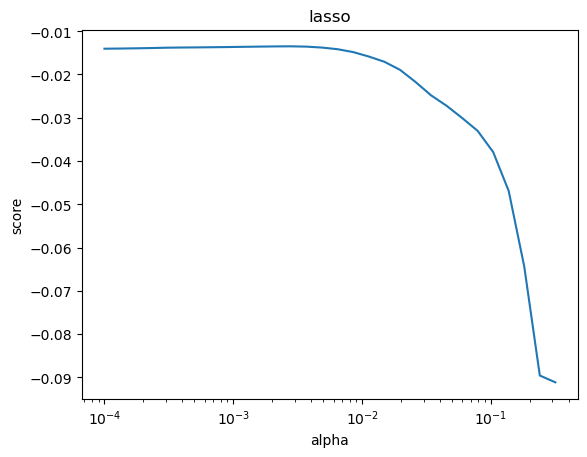

In [124]:
lasso=Lasso(random_state=42,max_iter=10000)

alphas=np.logspace(-4,-0.5,30)
tuned_parameters=[{"alpha":alphas}]
n_folds=5

clf=GridSearchCV(lasso,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

print("lasso coef: ",clf.best_estimator_.coef_)

lasso=clf.best_estimator_

print("lasso Best Estimator",lasso)
y_predicted_dummy=clf.predict(X_test)

mse=mean_squared_error(Y_test,y_predicted_dummy)
print("lasso mse: ",mse)
print("********************************************")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("lasso")

In [125]:
parameterGrid={"alpha": alphas,
              "l1_ratio":np.arange(0.0,1.0,0.05)}
eNet=ElasticNet(random_state=42,max_iter=10000)
clf=GridSearchCV(eNet,parameterGrid,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)

print("ElasticNet Coef:",clf.best_estimator_.coef_)

eNet=clf.best_estimator_

print("ElasticNet Best Estimator",eNet)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet Coef: [-0.0672668  -0.09552702 -0.07049618 -0.05091003  0.07404022 -0.05509689
  0.05031776  0.         -0.04422421 -0.06368124 -0.0122616  -0.01497307
  0.04345258]
ElasticNet Best Estimator ElasticNet(alpha=0.05968456995122311, l1_ratio=0.0, max_iter=10000,
           random_state=42)
ElasticNet MSE:  0.01865820681696484


"""Roboust SCALER
* LR mse:  0.020487058280775586
* ridge mse:  0.01937186998245171
* lasso mse:  0.018707192302889232
* ElasticNet MSE:  0.01865820681696484

"""

### XGBoost
* büyük ve karmaşık verisetlerinde

In [131]:
model_xgb=xgb.XGBRegressor(objective="reg:linear",max_depth=5,
                          min_child_weight=4,subsample=0.7,n_estimators=1000,
                          learning_rate=0.07)
model_xgb.fit(X_train,Y_train)
y_predicted_dummy=model_xgb.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("XGB mse: ",mse)

[14:08:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
XGB mse:  0.01932020789212713


* sonuç iyi değil parametre tuning yapalım

In [133]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}
model_xgb=xgb.XGBRegressor()
clf=GridSearchCV(model_xgb,parametersGrid,cv=n_folds,scoring="neg_mean_squared_error",refit=True,n_jobs=5,verbose=True)
clf.fit(X_train,Y_train)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("XGB mse: ",mse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[14:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

XGB mse:  0.017444718427058307


#### averaging models

In [144]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [145]:
averaged_models = AveragingModels(models = (model_xgb, lasso)) # en iyi sonuçlar
averaged_models.fit(X_train, Y_train)

y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)


Averaged Models MSE:  0.01797585635901092


* hyper parameter ile oynanabilir.
* outlierlar çıkart veya dahil et.
* feature eng yapılabilir.
* train- test split ile oynanabilir.
* standardization farklı yapılabilir.